# Natural Computing - Assignment 3 - Artificial Immune Systems
## Exercise 1 - Using the Negative Selection Algorithm
#### Submission by group 25 (Chihab Amghane, Max Driessen, Jordy Naus)

This file contains our code for exercise 1 of the "Artificial Immune Systems" assignment of the Natural Computing course.

### Imports

In [1]:
from subprocess import Popen, PIPE, STDOUT
import matplotlib.pyplot as plt
import numpy as np

### Interfacing with the Java implementation of the Negative Selection algorithm

In [2]:
def get_negsel_outputs(test_filename, 
                       train_filename="english.train",
                       alphabet_filename="english.train",
                       negsel_folder="negative-selection",
                       n=10, r=4, c=True, l=True):
    
    # Make sure that negsel_folder ends in / if it is not empty
    negsel_folder += "/" if not negsel_folder.endswith("/") and negsel_folder else ""
    
    # Create command using given filenames and parameters
    command = f"java -jar {negsel_folder}negsel2.jar " \
              f"-alphabet file://{negsel_folder}{alphabet_filename} " \
              f"-self {negsel_folder}{train_filename} " \
              f"-n {n} -r {r} {'-c' if c else ''} {'-l' if l else ''} " \
              f"< {negsel_folder}{test_filename}"
    
    # Run the command
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, bufsize=2, close_fds=True)
    
    # Extract and return output values (if multiple values are returned for one line, use the average)
    outputs = []
    for line in iter(process.stdout.readline, b''):
        values = [float(val) for val in line.rstrip().decode('utf-8').split(" ")]
        outputs.append(np.average(values) if values[0] == values[0] else 0.0)
    return outputs

### Computing ROC-AUC

In [3]:
def auc(self, foreign):
    
    def s(a, b):
        return 1 if a>b else 0 if a<b else 0.5
    
    # Compute Mann-Whitney U statistic
    u = sum([s(a,b) for a in foreign for b in self])

    # AUC = U/(len(self)*len(foreign))
    return u/(len(self)*len(foreign))

In [4]:
def roc_auc(self_outputs, foreign_outputs, title="ROC Curve"):
    # Initialize lists for True Positive Rate (sensitivity) and True Negative Rate (specificity) values
    TPRs, FPRs = [], []
    
    # Merge outputs
    merged_outputs = self_outputs + foreign_outputs
    cut_off_scores = sorted(set(merged_outputs))
    cut_off_scores += [max(cut_off_scores)+1]
    
    # Compute sensitivity and specificity for each cut-off score in the merged outputs
    for cut_off_score in cut_off_scores:
        # Calculate TPR/sensitivity: TP/(TP+FN) (% of "foreign_outputs" > cut-off score)
        TPRs.append(sum(np.array(foreign_outputs) >= cut_off_score) / len(foreign_outputs))

        # Calculate TNR/specificity: TN/(TN+FP) ($% of "self_outputs" < cut-off score)
        FPRs.append(1 - sum(np.array(self_outputs) < cut_off_score) / len(self_outputs))
    
    # Plot ROC curve
    plt.plot(FPRs, TPRs)
    plt.plot([0.0, 1.0], [0.0, 1.0], ls='--')
    plt.xlabel('False Positive Rate (1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title(title)
    plt.show()
    
    # Compute and print AUC score
    print(f"AUC = {auc(self_outputs, foreign_outputs)}")

## Assignment 1.1: ROC-AUC with *n* = 10, *r* = 4

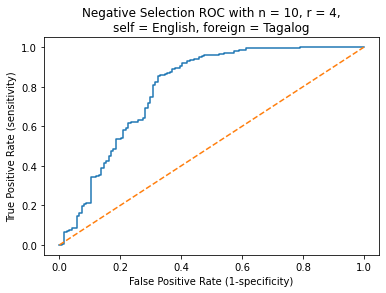

AUC = 0.7916097138691452


In [5]:
# Get the output of the negative selection algorithm on the English and Tagalog testing sets using r=4
english_outputs = get_negsel_outputs("english.test", r=4)
tagalog_outputs = get_negsel_outputs("tagalog.test", r=4)

# Compute and show ROC-AUC
roc_auc(english_outputs, 
        tagalog_outputs, 
        title="Negative Selection ROC with n = 10, r = 4,\nself = English, foreign = Tagalog")

## Assignment 1.2: Influence of $r$

### ROC-AUC with *n* = 10, for all values of *r* between 1 and 9

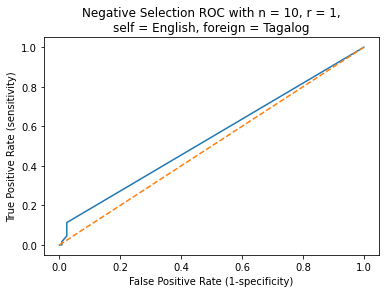

AUC = 0.543534718425369


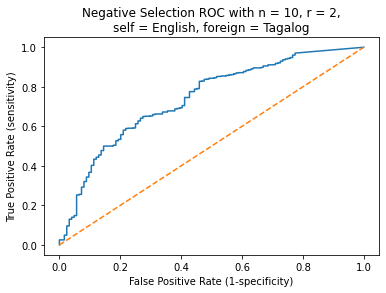

AUC = 0.7396459814106069


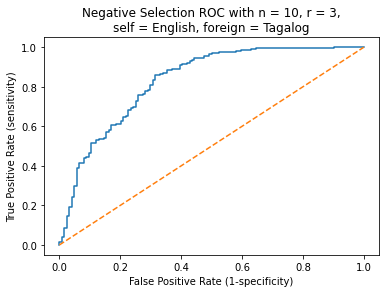

AUC = 0.8311235647895024


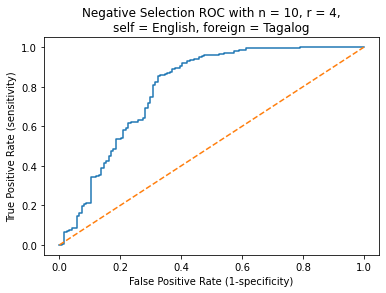

AUC = 0.7916097138691452


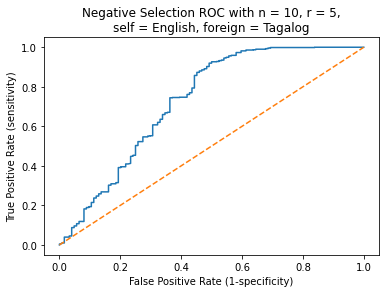

AUC = 0.7282440313468198


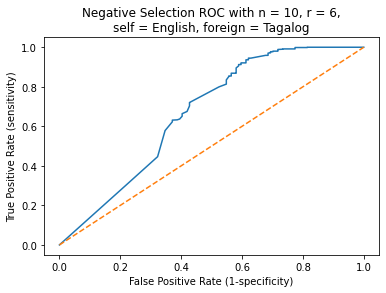

AUC = 0.6680847913249499


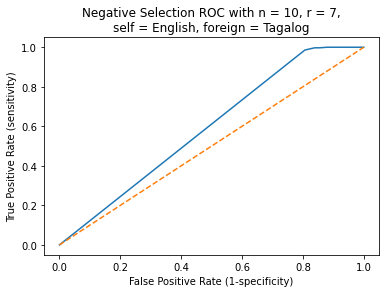

AUC = 0.5907258064516129


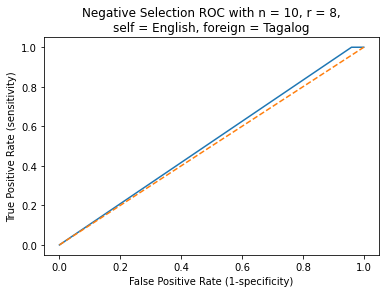

AUC = 0.5201612903225806


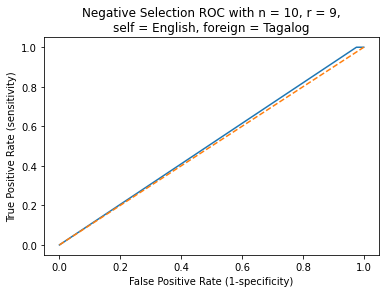

AUC = 0.5120967741935484


In [6]:
# Iterate through values of r
for r in range(1,10):
    # Get the output of the negative selection algorithm on the English and Tagalog testing sets using this value of r
    english_outputs = get_negsel_outputs("english.test", r=r)
    tagalog_outputs = get_negsel_outputs("tagalog.test", r=r)
    
    # Compute and show ROC-AUC
    roc_auc(english_outputs, 
            tagalog_outputs, 
            title=f"Negative Selection ROC with n = 10, r = {r},\nself = English, foreign = Tagalog")

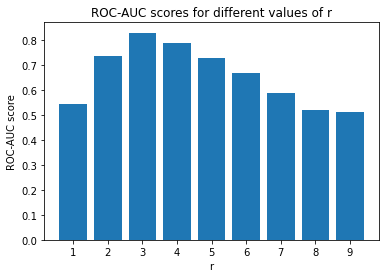

In [7]:
# Create list of all ROC-AUC scores
auc_scores = [0.543534718425369, 
              0.7396459814106069, 
              0.8311235647895024, 
              0.7916097138691452, 
              0.7282440313468198, 
              0.6680847913249499, 
              0.5907258064516129,
              0.5201612903225806,
              0.5120967741935484]

# Plot ROC-AUC scores as a function of r
plt.bar(range(1,10), auc_scores)
plt.xticks(range(1,10))
plt.xlabel("r")
plt.ylabel("ROC-AUC score")
plt.title("ROC-AUC scores for different values of r")
plt.show()

## Assignment 1.3: Testing with different languages

### Hiligaynon (*n* = 10, *r* = 4)

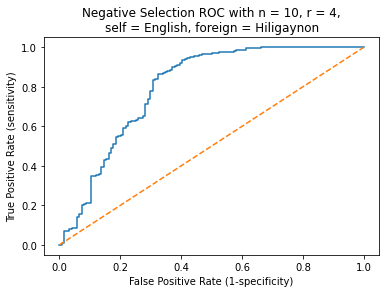

AUC = 0.7974677419354839


In [8]:
# Get the output of the negative selection algorithm on the English and Hiligaynon testing sets
english_outputs = get_negsel_outputs("english.test", r=4)
hiligaynon_outputs = get_negsel_outputs("lang/hiligaynon.txt", r=4)

# Compute and show ROC-AUC
roc_auc(english_outputs, 
        hiligaynon_outputs, 
        title = "Negative Selection ROC with n = 10, r = 4,\nself = English, foreign = Hiligaynon")

### Middle-English (*n* = 10, *r* = 4)

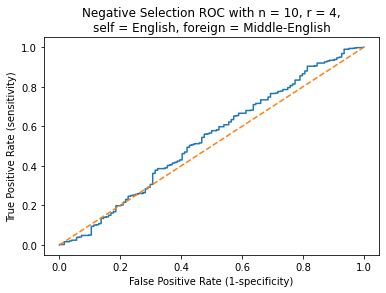

AUC = 0.5338870967741935


In [9]:
# Get the output of the negative selection algorithm on the English and Middle-English testing sets
english_outputs = get_negsel_outputs("english.test", r=4)
middle_english_outputs = get_negsel_outputs("lang/middle-english.txt", r=4)

# Compute and show ROC-AUC
roc_auc(english_outputs, 
        middle_english_outputs, 
        title = "Negative Selection ROC with n = 10, r = 4,\nself = English, foreign = Middle-English")

### Plautdietsch (*n* = 10, *r* = 4)

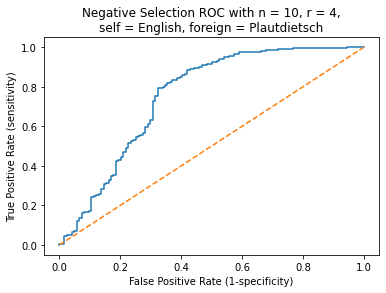

AUC = 0.7534032258064516


In [10]:
# Get the output of the negative selection algorithm on the English and Plautdietsch testing sets using r=4
english_outputs = get_negsel_outputs("english.test",r=4)
plautdietsch_outputs = get_negsel_outputs("lang/plautdietsch.txt", r = 4)

# Compute and show ROC-AUC
roc_auc(english_outputs, 
        plautdietsch_outputs, 
        title = "Negative Selection ROC with n = 10, r = 4,\nself = English, foreign = Plautdietsch")

### Xhosa (*n* = 10, *r* = 4)

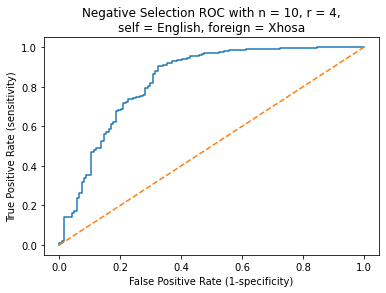

AUC = 0.832274193548387


In [11]:
# Get the output of the negative selection algorithm on the English and Xhosa testing sets using r=4
english_outputs = get_negsel_outputs("english.test",r=4)
xhosa_outputs = get_negsel_outputs("lang/xhosa.txt", r = 4)

# Compute and show ROC-AUC
roc_auc(english_outputs, 
        xhosa_outputs, 
        title = "Negative Selection ROC with n = 10, r = 4,\nself = English, foreign = Xhosa")